<H2>https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial/notebook</h2>

In [252]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [253]:
# Import data
data = 'datasets/weatherAUS.csv'

df = pd.read_csv(data)
df.shape

(145460, 23)

In [254]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<H1>Preprocessing</H1>

<H2>Categorical vs. Numerical variables </H2>

In [256]:
# Find categorical and numerical features.
categorical = [c for c in df.columns if df[c].dtype == 'O']
numerical = [c for c in df.columns if df[c].dtype == 'float64']

print(f"Categorical features: {categorical}")
print(f"Numerical features: {numerical}")

df[categorical].head()

Categorical features: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Numerical features: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [257]:
# Lets see number of unique values of each of the categorical columns
[[c, df[c].unique().size] for c in df[categorical].columns]

[['Date', 3436],
 ['Location', 49],
 ['WindGustDir', 17],
 ['WindDir9am', 17],
 ['WindDir3pm', 17],
 ['RainToday', 3],
 ['RainTomorrow', 3]]

In [258]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

<H2> Removing NULL values </H2>

In [259]:
print("Total number of rows,cols: ", df.shape)
print("\nNumber of null rows: ", df.isna().any(axis=1).sum())
print(f"Number of columns with null values: {df.isna().any().sum()}\n")
print(f"% of null values: \n{df[categorical].isnull().mean().sort_values() * 100}\n")
print(f"Number of null values per categorical column: \n{df[categorical].isnull().sum().sort_values()}\n")

Total number of rows,cols:  (145460, 23)

Number of null rows:  89040
Number of columns with null values: 21

% of null values: 
Date            0.000000
Location        0.000000
RainToday       2.241853
RainTomorrow    2.245978
WindDir3pm      2.906641
WindGustDir     7.098859
WindDir9am      7.263853
dtype: float64

Number of null values per categorical column: 
Date                0
Location            0
RainToday        3261
RainTomorrow     3267
WindDir3pm       4228
WindGustDir     10326
WindDir9am      10566
dtype: int64



<H3> Drop target rows where RainTomorrow (target variable) is null</h3>

In [260]:
# Drop rows where RainTomorrow is null.
df.dropna(subset=['RainTomorrow'], inplace=True)

<h2> Convert output columns to binary</h2>

In [261]:
# Convert output columns to int (0|1)
df['RainToday'] = df['RainToday'].replace({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0})

print((df['RainTomorrow'] * df['RainToday']).isnull().sum())
print(f"% of null values: \n{df[['RainToday', 'RainTomorrow']].isnull().sum()}\n")

1406
% of null values: 
RainToday       1406
RainTomorrow       0
dtype: int64



<H2>Encode the date column</h2>

In [262]:
# Encode the Date column.
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df = df.drop(labels=['Date'], axis=1)
df.info()

categorical = [c for c in df.columns if df[c].dtype == 'O']

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null   fl

<h2> Categorical variables: </h2>
<h3>Replace categorical null values with mode </h3>

In [263]:
# Lets fix the null values for categorical columns by replacing them with Mode.
for c in categorical:
    df[c] = df[c].fillna(df[c].mode()[0])
    
print(f"Number of null values per categorical column: \n{df[categorical].isnull().sum().sort_values()}\n")

Number of null values per categorical column: 
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64



<h2>Numerical columns <h2>
<h3>Replace null values</h3>
<ul>
    <li>Numerical values can be replaced by mean if the distribution is normal</li>
    <li>Numerical values an be replace dby median if the distribution isn't normal</li>
    <li>Numerical values can also be replaced using an Imputer, where machine learning is used to predict missing values in column.</li>
    <li>Categorical values can be replaced by Mode</li>
</ul>

In [264]:
# Fix null values for non-categorical values.
print(f"Number of null values per numerical column: \n{df[numerical].isnull().sum().sort_values()}\n")

Number of null values per numerical column: 
MaxTemp            322
MinTemp            637
Temp9am            904
WindSpeed9am      1348
Rainfall          1406
Humidity9am       1774
WindSpeed3pm      2630
Temp3pm           2726
Humidity3pm       3610
WindGustSpeed     9270
Pressure3pm      13981
Pressure9am      14014
Cloud9am         53657
Cloud3pm         57094
Evaporation      60843
Sunshine         67816
dtype: int64



In [265]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
df[['MinTemp']] = scaler.fit_transform(df[['MinTemp']])

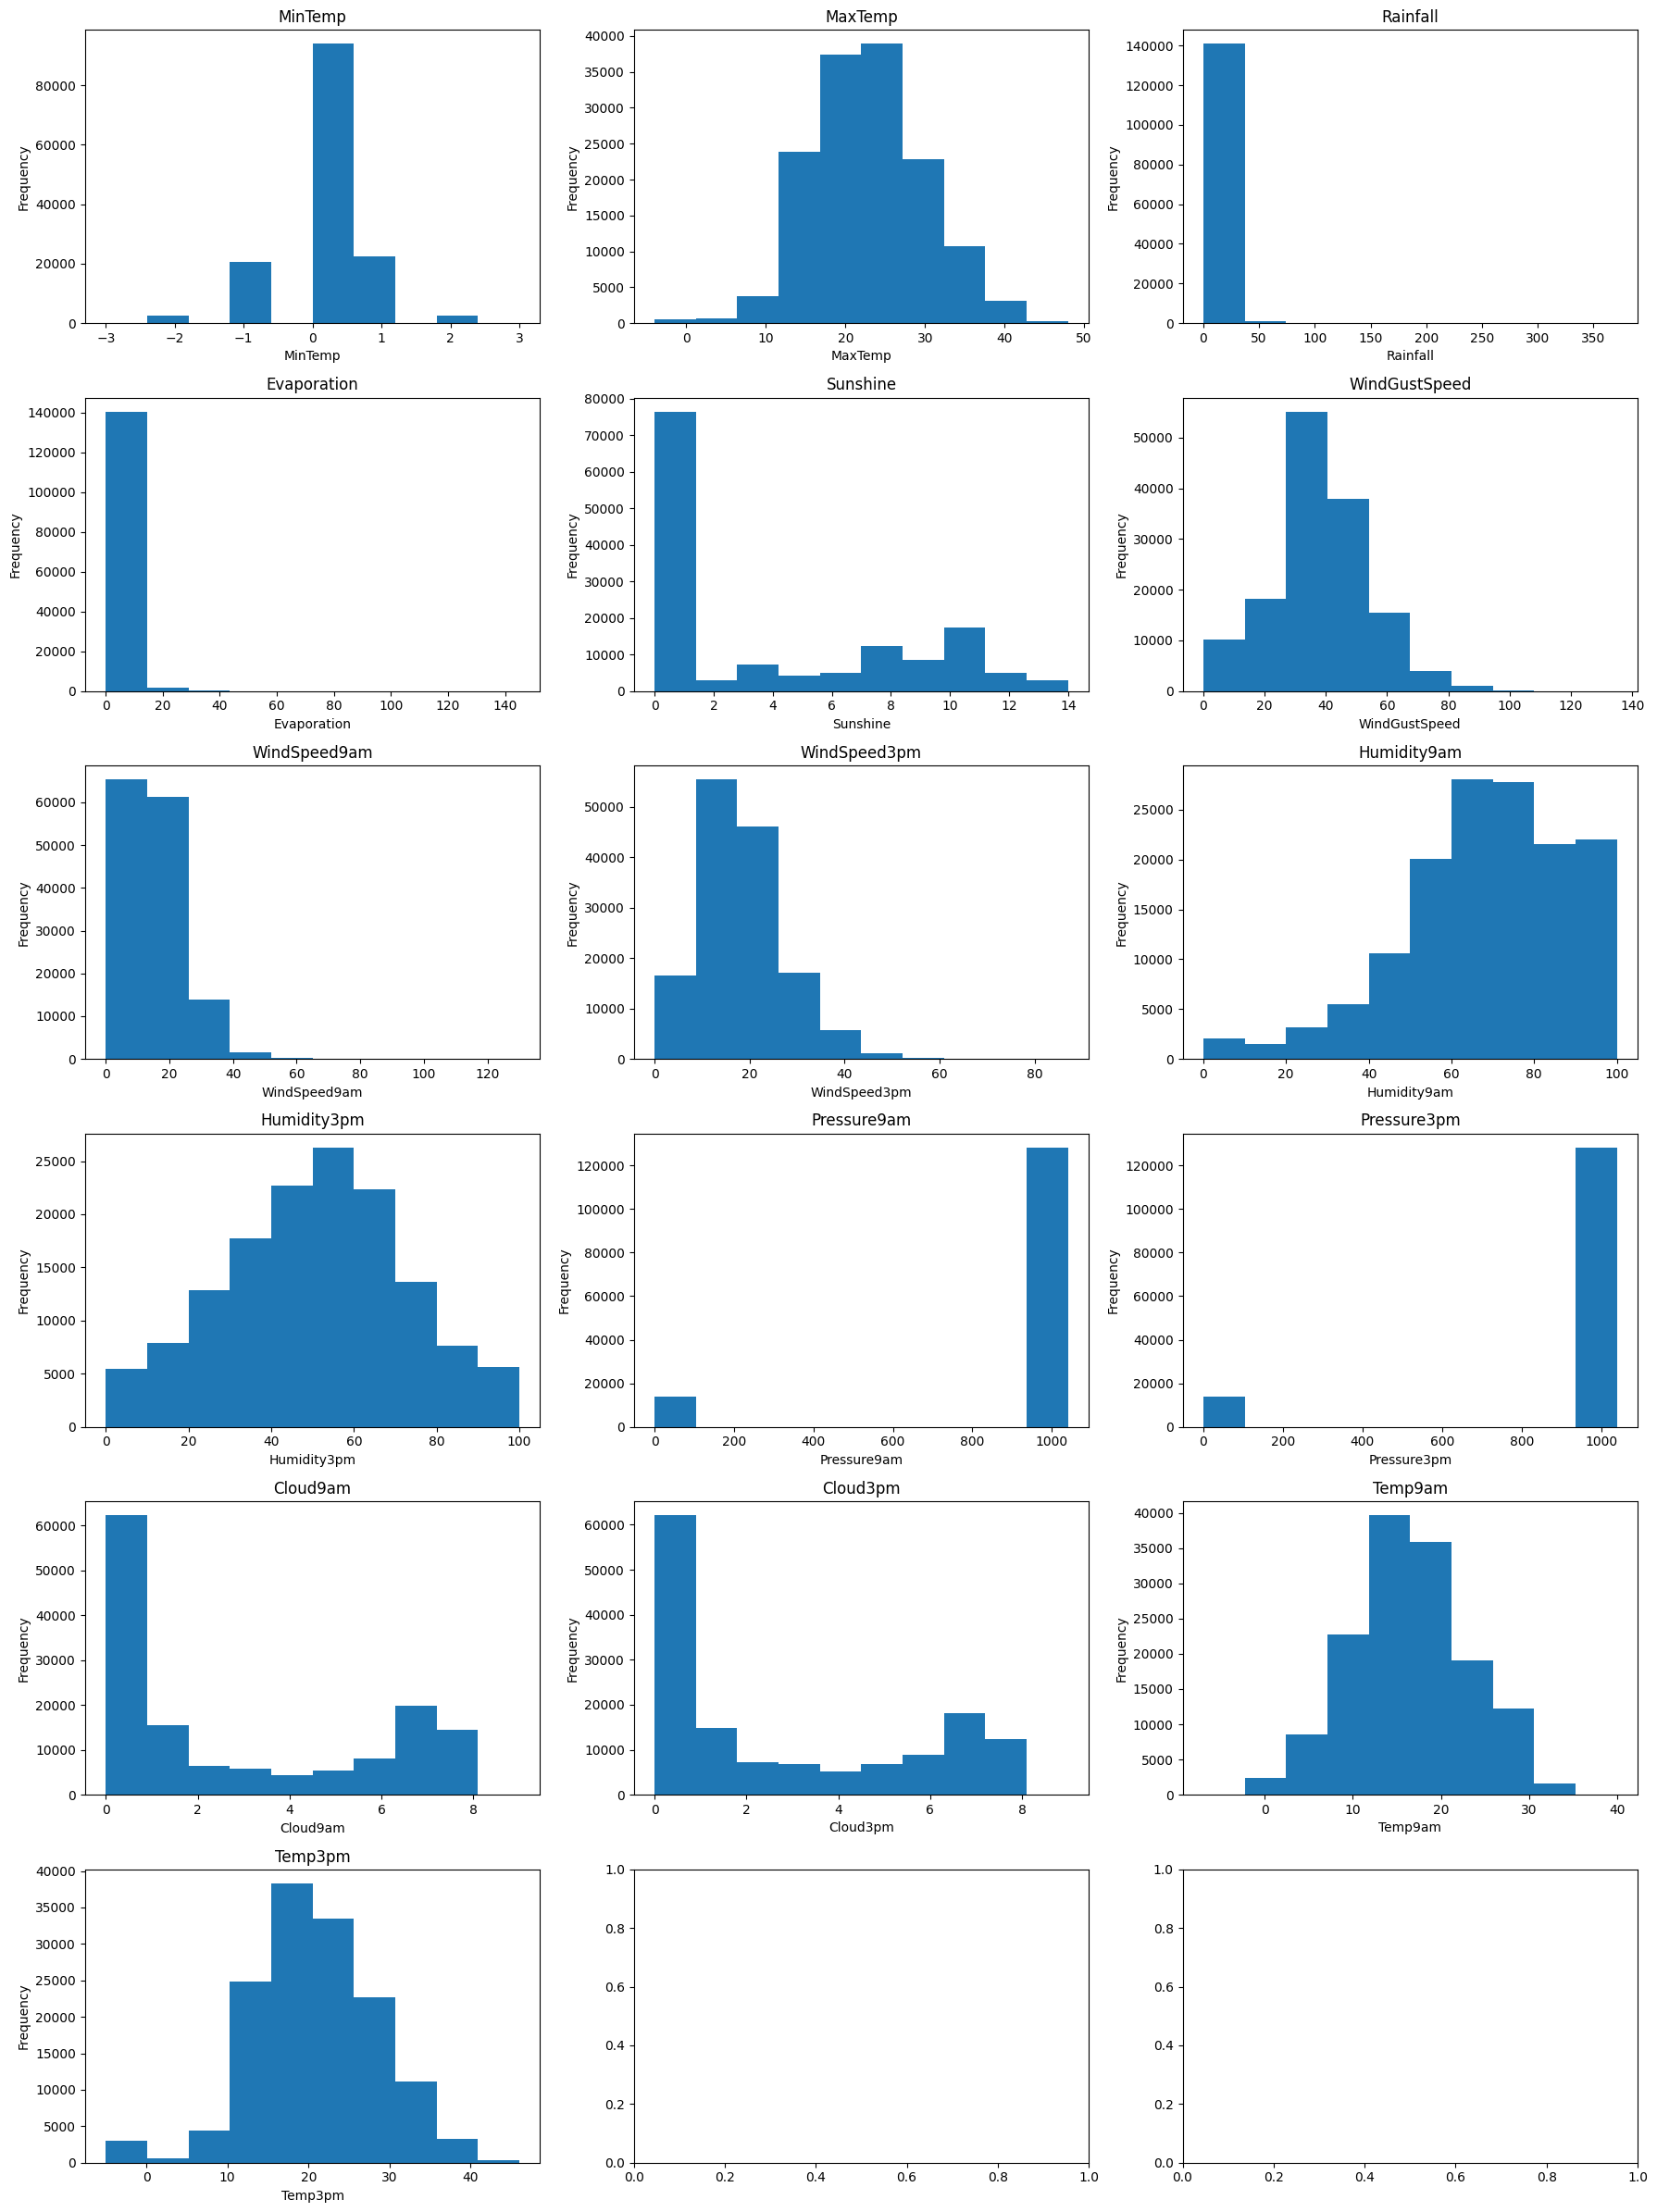

In [266]:
# Check distribution of all numerical columns.
# For normal distributions we can use mean as a placeholder for na. Otherwise median is preferred.
fig, axes = plt.subplots(nrows=len(numerical)//3+1, ncols=3, figsize=(18, 24))
axes = axes.flatten()  # Flatten the axes array to make it easier to iterate

for i, col in enumerate(numerical):
    df[col].fillna(0).astype(int).plot(kind='hist', ax=axes[i], title=col, bins=10)
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

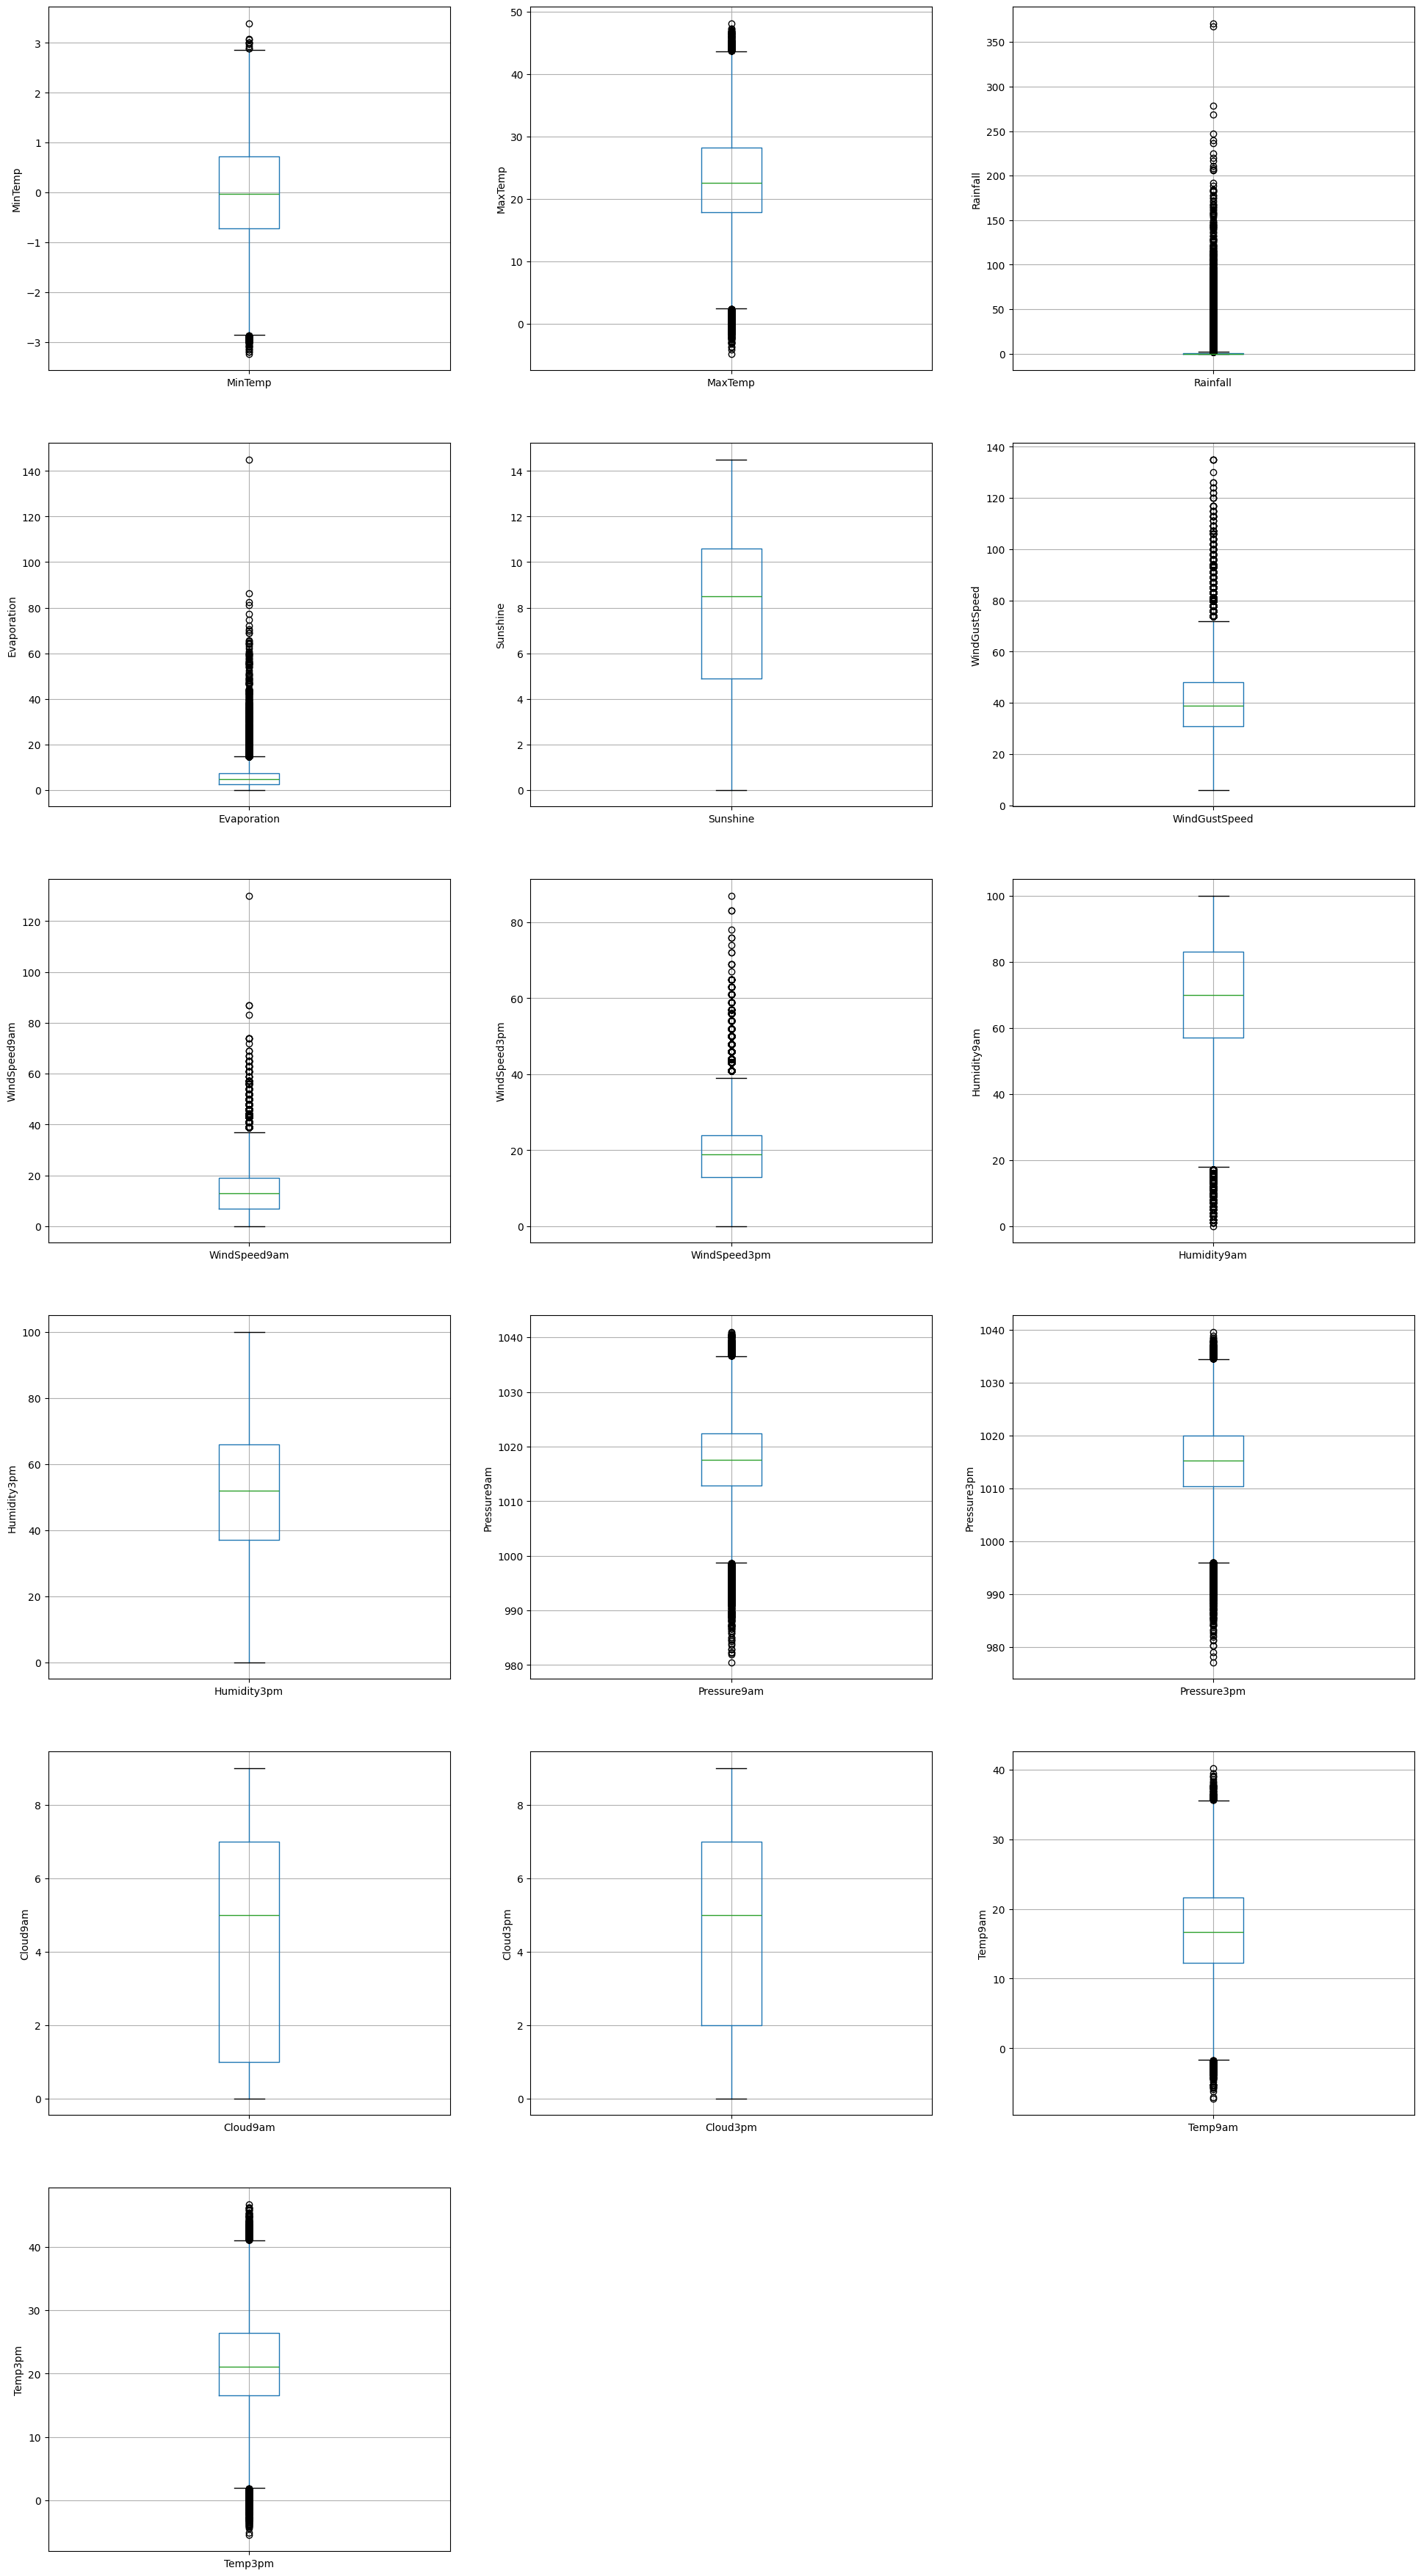

In [267]:
# draw boxplots to visualize outliers
plt.figure(figsize=(24, 45))

# Check distribution of all numerical columns.
# For normal distributions we can use mean as a placeholder for na. Otherwise median is preferred.

for i, col in enumerate(numerical):
    plt.subplot(len(numerical)//3+1, 3, i+1)
    fig = df.boxplot(column=col)
    fig.set_title('')
    fig.set_ylabel(col)

plt.show()

In [268]:
# Function to calculate outliers using IQR method
def calculate_outliers(df, columns):
    outliers = {}
    
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile) and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        num_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        
        # Calculate % of outliers
        outliers_percentage = (num_outliers / len(df)) * 100
        outliers[col] = [lower_bound, upper_bound, outliers_percentage]
    
    return outliers

# Get the % of outliers for specified columns
outliers = calculate_outliers(df, numerical)

# Print the results
print("Percentage of outliers for each column:")
for col, outlier_data in outliers.items():
    lower, upper, perc = outlier_data
    print(f"{col}: {perc:.2f}%, [{lower:.2f}, {upper:.2f}]")
    
for col, outlier_data in outliers.items():
    lower_bound = outlier_data[0]
    upper_bound = outlier_data[1]
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)


Percentage of outliers for each column:
MinTemp: 0.05%, [-2.87, 2.88]
MaxTemp: 0.32%, [2.45, 43.65]
Rainfall: 17.74%, [-1.20, 2.00]
Evaporation: 1.37%, [-4.60, 14.60]
Sunshine: 0.00%, [-3.65, 19.15]
WindGustSpeed: 2.11%, [5.50, 73.50]
WindSpeed9am: 1.22%, [-11.00, 37.00]
WindSpeed3pm: 1.73%, [-3.50, 40.50]
Humidity9am: 1.00%, [18.00, 122.00]
Humidity3pm: 0.00%, [-6.50, 109.50]
Pressure9am: 0.83%, [998.65, 1036.65]
Pressure3pm: 0.64%, [996.00, 1034.40]
Cloud9am: 0.00%, [-8.00, 16.00]
Cloud3pm: 0.00%, [-5.50, 14.50]
Temp9am: 0.17%, [-1.65, 35.55]
Temp3pm: 0.52%, [1.90, 41.10]


<h2>Impute the missing numerical values </h2>

<h2>One hot encode</h2>
<h3> Encode categorical columns and drop the original columns</h3>

In [269]:
# Encode the Location column.
from sklearn.preprocessing import OneHotEncoder

# Do one hot encoding.
# Remove the 2 output columns and date.
categorical = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
print(f"Categorial columns = {categorical}")

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(df[categorical])

print(f"Categories : {encoder.categories_}")
print(f"Feature names out: {encoder.get_feature_names_out(categorical)}")

encoded_cols = encoder.transform(df[categorical])
df[encoder.get_feature_names_out(categorical)] = encoded_cols

df = df.drop(labels=categorical, axis=1)

categorical = [c for c in df.columns if df[c].dtype == 'O']

Categorial columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
Categories : [array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
       'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
       'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
       'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
       'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
       'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
       'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
       'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
      dtype=object), array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object), array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW

In [270]:
from sklearn.impute import KNNImputer, SimpleImputer

# Create the KNN imputer
imputer = SimpleImputer()

print(numerical)
# Fit and transform the dataset
df[numerical] = imputer.fit_transform(df[numerical])

print(f"Number of null values: \n{df.isnull().sum().sort_values()}\n")

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Number of null values: 
MinTemp                  0
WindDir9am_ESE           0
WindDir9am_ENE           0
WindDir9am_E             0
WindGustDir_WSW          0
                        ..
Location_Darwin          0
Location_Dartmoor        0
Location_CoffsHarbour    0
RainToday_1.0            0
RainToday_nan            0
Length: 120, dtype: int64



In [271]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_0.0,RainToday_1.0,RainToday_nan
0,0.189528,22.9,0.6,5.321137,7.624853,44.0,20.0,24.0,71.0,22.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.747494,25.1,0.0,5.321137,7.624853,44.0,4.0,22.0,44.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.111443,25.7,0.0,5.321137,7.624853,46.0,19.0,26.0,38.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,-0.466387,28.0,0.0,5.321137,7.624853,24.0,11.0,9.0,45.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.829827,32.3,1.0,5.321137,7.624853,41.0,7.0,20.0,82.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<h2>Outlier detection<h2>

In [272]:
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,0.000029,23.229947,0.485723,5.321137,7.624853,39.789209,13.912024,18.549386,68.897257,51.482606,1017.674282,1015.272206,4.437189,4.503167,16.988469,21.689812
std,0.997613,7.091985,0.787927,2.585528,2.734927,12.540045,8.550996,8.447055,18.778693,20.532065,6.668626,6.623879,2.278080,2.104709,6.465182,6.844153
min,-2.871412,2.450000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,18.000000,0.000000,998.650000,996.000000,0.000000,0.000000,-1.650000,1.900000
25%,-0.716260,17.900000,0.000000,4.000000,7.624853,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000
50%,-0.029110,22.700000,0.000000,5.321137,7.624853,39.000000,13.000000,18.549386,70.000000,51.482606,1017.674282,1015.272206,4.437189,4.503167,16.800000,21.300000
75%,0.720508,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000
max,2.875660,43.650000,2.000000,14.600000,14.500000,73.500000,37.000000,40.500000,100.000000,100.000000,1036.650000,1034.400000,9.000000,9.000000,35.550000,41.100000


Training and inferernce


In [273]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [274]:
X_train.shape, X_test.shape

((113754, 119), (28439, 119))

In [275]:
X_train.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_0.0,RainToday_1.0,RainToday_nan
113462,0.267614,22.6,0.2,5.321137,7.624853,41.000000,20.0,28.000000,65.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
89638,1.595063,29.4,2.0,6.000000,6.300000,33.000000,7.0,18.549386,71.0,59.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
138130,-0.388302,36.2,0.0,11.400000,12.300000,31.000000,15.0,11.000000,18.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
87898,1.298339,30.1,0.0,8.800000,11.100000,37.000000,22.0,19.000000,59.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16484,0.720508,29.2,0.0,5.321137,7.624853,39.789209,0.0,7.000000,72.0,53.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [276]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')